# Data Collection Phase

In this phase , data is collected from various social media sites like Twitter and Reddit.

## 1. Collecting Data from Twitter using tweepy API

In [ ]:
from tweepy import API 
from tweepy import Cursor
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
 
import twitter_credentials
import numpy as np
import pandas as pd
# # # # TWITTER CLIENT # # # #
class TwitterClient():
    def __init__(self, twitter_user=None):
        self.auth = TwitterAuthenticator().authenticate_twitter_app()
        self.twitter_client = API(self.auth)

        self.twitter_user = twitter_user

    def get_twitter_client_api(self):
        return self.twitter_client


# # # # TWITTER AUTHENTICATER # # # #
class TwitterAuthenticator():

    def authenticate_twitter_app(self):
        auth = OAuthHandler(twitter_credentials.CONSUMER_KEY, twitter_credentials.CONSUMER_SECRET)
        auth.set_access_token(twitter_credentials.ACCESS_TOKEN, twitter_credentials.ACCESS_TOKEN_SECRET)
        return auth

# # # # TWITTER STREAMER # # # #
class TwitterStreamer():
    """
    Class for streaming and processing live tweets.
    """
    def __init__(self):
        self.twitter_autenticator = TwitterAuthenticator()    

    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        # This handles Twitter authetification and the connection to Twitter Streaming API
        listener = TwitterListener(fetched_tweets_filename)
        auth = self.twitter_autenticator.authenticate_twitter_app() 
        stream = Stream(auth, listener)

        # This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list)


# # # # TWITTER STREAM LISTENER # # # #
class TwitterListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """
    def __init__(self, fetched_tweets_filename):
        self.fetched_tweets_filename = fetched_tweets_filename

    def on_data(self, data):
        try:
            print(data)
            with open(self.fetched_tweets_filename, 'a') as tf:
                tf.write(data)
            return True
        except BaseException as e:
            print("Error on_data %s" % str(e))
        return True
          
    def on_error(self, status):
        if status == 420:
            # Returning False on_data method in case rate limit occurs.
            return False
        print(status)


class TweetAnalyzer():
    """
    Functionality for analyzing and categorizing content from tweets.
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

        #df['id'] = np.array([tweet.id for tweet in tweets])
        #df['len'] = np.array([len(tweet.text) for tweet in tweets])
        #df['date'] = np.array([tweet.created_at for tweet in tweets])
        #df['source'] = np.array([tweet.source for tweet in tweets])
        #df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
        #df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

 
if __name__ == '__main__':

    twitter_client = TwitterClient()
    tweet_analyzer = TweetAnalyzer()

    api = twitter_client.get_twitter_client_api()

    tweets = api.user_timeline(screen_name="AUSvIND", count=500)

    #print(dir(tweets[0]))
    #print(tweets[0].retweet_count)

    df = tweet_analyzer.tweets_to_data_frame(tweets)
    
    print(df.head(50))
    #df.to_pickle('tweets.pkl')
    df.to_csv('twitterdata.csv')

## 2. Collecting data from Reddit using Praw API

In [24]:
import praw
import pandas as pd
from praw.models import MoreComments
reddit = praw.Reddit(client_id='MjOYmV5QB4Q8bw', client_secret='Ha-Bem-WhpBXOFu6sQExGW1u760', user_agent='Scraping Example')

"""
# get 10 hot posts from the MachineLearning subreddit
hot_posts = reddit.subreddit('Cricket').hot(limit=10)
for post in hot_posts:
    print(post.title)
"""
#comments = []
comments=""
submission = reddit.submission(id="f1zmjl")
submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments:
    comments = comments + top_level_comment.body
    #comments.append([top_level_comment.body])
#comments = pd.DataFrame(comments,columns=['comment'])
print(comments)
#comments.to_pickle('redditdataset.pkl')
comments.to_csv('redditdataset.csv', sep='\t', encoding='utf-8', index=False)

str

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)
fdist.most_common(2)

In [6]:
# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()


<Figure size 640x480 with 1 Axes>

# Data Processing Phase

Performing data mining algorithms on collected data to retrieve information.



## Applying TF-IDF to collected dataset

In [1]:
with open('twitterdata.csv', 'r') as twitterfile:
    twittertext = twitterfile.readlines()
# Converting List to String
twitterdoc = ' '.join(map(str, twittertext))

In [2]:
with open('redditdataset.csv', 'r') as redditfile:
    reddittext = redditfile.readlines()
# Converting List to String
redditdoc = ' '.join(map(str, reddittext))

In [3]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
tokenized_text=sent_tokenize(redditdoc)
tokenized_word=word_tokenize(redditdoc)

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/warlock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
redditfilter = []
for w in tokenized_word:
    if w not in stop_words:
        redditfilter.append(w)
rd = ' '.join(map(str, redditfilter))

In [6]:
import re
rwo = re.findall(r'\w+', rd)
rdi = [i for i in rwo if not i.isdigit()]
fw = [i for i in rdi if len(i) > 1]
redditdoc = ' '.join(map(str, fw))

In [ ]:
# Slicing the string into two to perform TF - IDF Algorithm
#str_one, str_two = filt_sent_string[:len(filt_sent_string)//2],filt_sent_string[len(filt_sent_string)//2:] 


In [9]:
import math
from textblob import TextBlob as tb

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

document1 = tb(twitterdoc)

document2 = tb(redditdoc)

bloblist = [document1, document2]
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:5]:
        #print("Word: {}, TF-IDF: {}".format(word, round(score, 5)))
        if not word.isdigit():
            print(word)

Top words in document 1
Tweets
Kumble
70.5
Top words in document 2
comment
So
worst
series
Kohli


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [11]:
response = tfidf.fit_transform([twitterdoc, redditdoc])

In [13]:
feature_names = tfidf.get_feature_names()
for col in response.nonzero()[1]:
    if not feature_names[col].isdigit() and len(feature_names[col]) > 3:
        print (feature_names[col], ' - ', response[0, col])

hogg  -  0.009951913612956562
testing  -  0.003540434250392883
johnson  -  0.014927870419434842
clark  -  0.004975956806478281
jaffer  -  0.014927870419434842
yuvraj  -  0.007080868500785766
sharma  -  0.007080868500785766
break  -  0.007080868500785766
innings  -  0.007080868500785766
jaques  -  0.03980765445182625
lunch  -  0.014927870419434842
rain  -  0.014927870419434842
delayed  -  0.014927870419434842
hayden  -  0.08851085625982207
stumps  -  0.028323474003143063
symonds  -  0.19406231545265296
hussey  -  0.1542546610008267
laxman  -  0.0814299877590363
tendulkar  -  0.11329389601257225
dravid  -  0.11683433026296514
ganguly  -  0.0796153089036525
dhoni  -  0.031863908253535946
singh  -  0.046025645255107474
harbhajan  -  0.044783611258304525
wicket  -  0.09559172476060783
over  -  0.004975956806478281
match  -  0.014161737001571532
kumble  -  0.05971148167773937
india  -  0.27615387153064486
tweets  -  0.004975956806478281
t20wc  -  0.0
orange  -  0.0
different  -  0.0
joke  - 

restless  -  0.0
unlike  -  0.0
stuck  -  0.0
gloves  -  0.0
give  -  0.0
shifted  -  0.0
clarity  -  0.0
summarized  -  0.0
mediocre  -  0.0
others  -  0.0
dogshite  -  0.0
bowled  -  0.0
doubt  -  0.0
destroyed  -  0.0
t20s  -  0.0
outplayed  -  0.0
absolutely  -  0.0
handsome  -  0.0
nair  -  0.0
karun  -  0.0
place  -  0.0
drop  -  0.0
averaged  -  0.0
unsual  -  0.0
pretty  -  0.0
props  -  0.0
earned  -  0.0
feeling  -  0.0
value  -  0.0
given  -  0.0
mind  -  0.0
teach  -  0.0
assuming  -  0.0
bouncer  -  0.0
balls  -  0.0
stump  -  0.0
strategy  -  0.0
forward  -  0.0
bring  -  0.0
idea  -  0.0
lengths  -  0.0
bouncers  -  0.0
idiot  -  0.0
paid  -  0.0
coach  -  0.0
packs  -  0.0
hunt  -  0.0
rubbish  -  0.0
magic  -  0.0
expect  -  0.0
effective  -  0.0
shami  -  0.0
needs  -  0.0
honestly  -  0.0
assumption  -  0.0
bold  -  0.0
gods  -  0.0
ancient  -  0.0
should  -  0.0
hand  -  0.0
invested  -  0.0
sorrows  -  0.0
drowning  -  0.0
busy  -  0.0
crictracker  -  0.0
stands  -

take  -  0.0
contribution  -  0.0
minimal  -  0.0
dhawan  -  0.0
rohit  -  0.0
matches  -  0.0
scores  -  0.0
dammm  -  0.0
fucking  -  0.0
recognises  -  0.0
decision  -  0.0
wise  -  0.0
life  -  0.0
bros  -  0.0
together  -  0.0
play  -  0.0
boys  -  0.0
karnataka  -  0.0
trophy  -  0.0
lift  -  0.0
back  -  0.0
came  -  0.0
sodhi  -  0.0
rate  -  0.0
economy  -  0.0
throughout  -  0.0
thakur  -  0.0
shardul  -  0.0
scoreline  -  0.0
reflection  -  0.0
accurate  -  0.0
entirely  -  0.0
entire  -  0.0
pasting  -  0.0
brutal  -  0.0
really  -  0.0
showed  -  0.0
think  -  0.0
side  -  0.0
which  -  0.0
promote  -  0.0
reckon  -  0.0
smith  -  0.0
steve  -  0.0
better  -  0.0
today  -  0.0
overall  -  0.0
five  -  0.0
last  -  0.0
third  -  0.0
completes  -  0.0
rahul  -  0.0
soon  -  0.0
batting  -  0.0
carry  -  0.0
sick  -  0.0
jadeja  -  0.0
whitewash  -  0.0
cunt  -  0.0
dumb  -  0.0
holeing  -  0.0
genius  -  0.0
looks  -  0.0
every  -  0.0
x200b  -  0.0
team  -  0.0
dropped  -  

In [17]:
#import csv

#with open('redditdataset.csv', newline='') as f:
    #reader = csv.reader(f)
    #data = list(reader)

#print(data)

# Sentiment Analysis using NLTK

In [3]:
import pandas as pd
messages = [line.rstrip() for line in open("redditdataset.csv")]
data = pd.read_csv("redditdataset.csv",sep="\n",names=["message"])

In [7]:
data["message"][1]
#just to check if datacorpus is loaded currectly.

'So this is the worst series of Kohli like in years.'

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/warlock/nltk_data...


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:
sid = SentimentIntensityAnalyzer()

In [15]:
summary = {"positive":0,"neutral":0,"negative":0}
for x in messages: 
    ss = sid.polarity_scores(x)
    if ss["compound"] == 0.0: 
        summary["neutral"] +=1
    elif ss["compound"] > 0.0:
        summary["positive"] +=1
    else:
        summary["negative"] +=1
print(summary)

{'positive': 206, 'neutral': 448, 'negative': 140}


In [16]:
type(summary)

dict

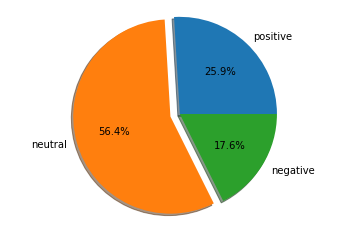

In [51]:
import matplotlib.pyplot as plt
labels = tuple(summary.keys())
sizes = list(summary.values())
explode = (0, 0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
plt.axis('equal')
plt.show()